In [1]:
def PointsLian(*args:tuple[float, float]):
    points = sorted(args, key=lambda x: x[0])
    
    def wrapper(x: float) -> float:
        if x <= points[0][0]: 
            return points[0][1]
        elif x >= points[-1][0]: 
            return points[-1][1]
        
        for i in range(len(points) - 1):
            if points[i][0] <= x < points[i+1][0]:
                slope = (points[i+1][1] - points[i][1]) / (points[i+1][0] - points[i][0])
                return points[i][1] + slope * (x - points[i][0])
        
        return None
    return wrapper

def Trap(a, b, c, d):
    return PointsLian((a, 0), (b, 1), (c,1), (d,0))


def Trian(a,b,c):
    return Trap(a,b,b,c)


def min_func(funcs):
    def wrapper(x:float):
        return min(*[func(x) for func in funcs])
    return wrapper

def max_func(funcs):
    def wrapper(x:float):
        return max(*[func(x) for func in funcs])
    return wrapper


In [2]:
import warnings
from scipy.integrate import IntegrationWarning
warnings.catch_warnings()
warnings.simplefilter("ignore", IntegrationWarning)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

/home/volodya/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
class Term:
    def __init__(self, name, membership_function):
        self.name = name
        self.membership_function = membership_function

    def evaluate(self, value):
        return self.membership_function(value)
    
    

In [5]:
class LinguisticVariable:
    def __init__(self, name, terms:list[Term]=None, value = None):
        self.name = name
        self.terms = terms or []
        self.value = value

    def getTermPairByName(self, name):
        for term in self.terms:
            if term.name == name:
                return self.name, term
        return None
    
    def withValue(self, value):
        return LinguisticVariable(self.name, self.terms, value)

    def display(self, a, b, ax = plt):
        for term in self.terms:
            x = np.linspace(a, b, 1000)

            ax.plot(x, [term.evaluate(y) for y in x], label=term.name)
            ax.fill_between(x, [term.evaluate(y) for y in x], alpha=0.3)
        ax.set_title("Лингвистическая переменная \n" + self.name)
        ax.legend()
        ax.grid()

In [6]:
class Rule:
    def __init__(self, input_variables: dict[str, Term], output_variable: str, ouput_term: Term):
        self.input_variables = input_variables
        self.output_variable = output_variable
        self.ouput_term = ouput_term

    def matches(self, variable_name:str, value:float):
        if variable_name not in self.input_variables:
            return 0
        
        return self.input_variables[variable_name].evaluate(value)

    def output_func(self, min_value:float):
        def retc(x):
            return min_value
        return min_func([self.ouput_term.evaluate, retc])
    def __repr__(self):
        return "{:} -> {:}={:}".format(
            " & ".join(["{:}={:}".format(
                var, self.input_variables[var].name)
                  for var in self.input_variables]),
            self.output_variable,
            self.ouput_term.name,
        )


In [ ]:
def Search(inputVaribles: list[LinguisticVariable], rules = list[Rule]):
    result_funcs = []
    result_funcs_t = []
    for rule in rules:
        value = 1
        for var in inputVaribles:
            value = min(
                rule.matches(var.name, var.value),
                value)

        if value > 0:
            result_funcs.append(
                rule.output_func(value)
            )

            result_funcs_t.append(
                (rule.ouput_term.name, rule.output_func(value))
            )
            print("Activated", rule)
    if len(result_funcs) == 1:
        return result_funcs[0]
    if len(result_funcs) == 0:
        return lambda x: 0



    return max_func(result_funcs), result_funcs_t




Дистанция=Низкая -> Скорость=Низкая
Дистанция=Средняя -> Скорость=Средняя
Дистанция=Высокая -> Скорость=Высокая
Дистанция=Высокая -> Скорость=Очень высокая


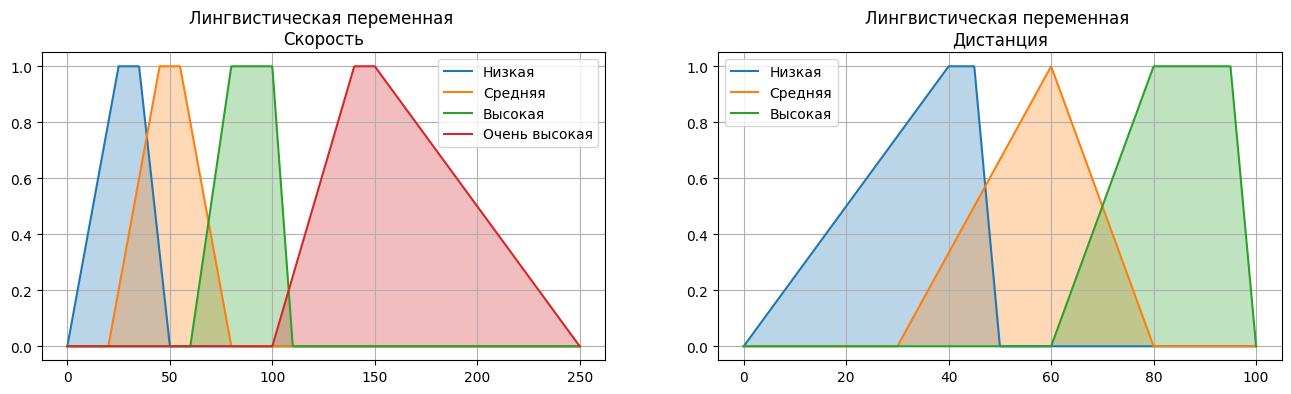

In [8]:
speed = LinguisticVariable('Скорость', [
    Term('Низкая', Trap(0, 25, 35, 50)),
    Term('Средняя', Trap(20, 45, 55, 80)),
    Term('Высокая', Trap(60, 80, 100, 110)),
    Term('Очень высокая', Trap(100, 140, 150, 250)),
])


distance = LinguisticVariable('Дистанция', [
    Term('Низкая', Trap(0, 40, 45, 50)),
    Term('Средняя', Trap(30, 60, 60, 80)),
    Term('Высокая', Trap(60, 80, 95, 100)),
])


rules = [
    Rule({distance.name: distance.terms[0]}, speed.name, speed.terms[0]),
    Rule({distance.name: distance.terms[1]}, speed.name, speed.terms[1]),
    Rule({distance.name: distance.terms[2]}, speed.name, speed.terms[2]),
    Rule({distance.name: distance.terms[2]}, speed.name, speed.terms[3]),
]

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

speed.display(0, 250, ax[0])
distance.display(0, 100, ax[1])
print("\n".join(["{:}".format(rule) for rule in rules]))

Центр масс функции $f(x)$ на интервале $[a,b]$. Центр масс функции можно найти по формуле:

$$ x_{cm} = \frac{\int_a^b x \cdot f(x) \space dx}{\int_a^b f(x) \space dx}$$



In [9]:
from scipy.integrate import quad

def center_of_mass(f, a, b):
    numerator, _ = quad(lambda x: x * f(x), a, b)
    denominator, _ = quad(f, a, b)
    
    if denominator == 0:
        raise ZeroDivisionError("Функция f(x) равна нулю на всем интервале")
    
    # Находим центр масс
    res = numerator / denominator
    
    return res

Новое значение переменной: 35.27386526018405


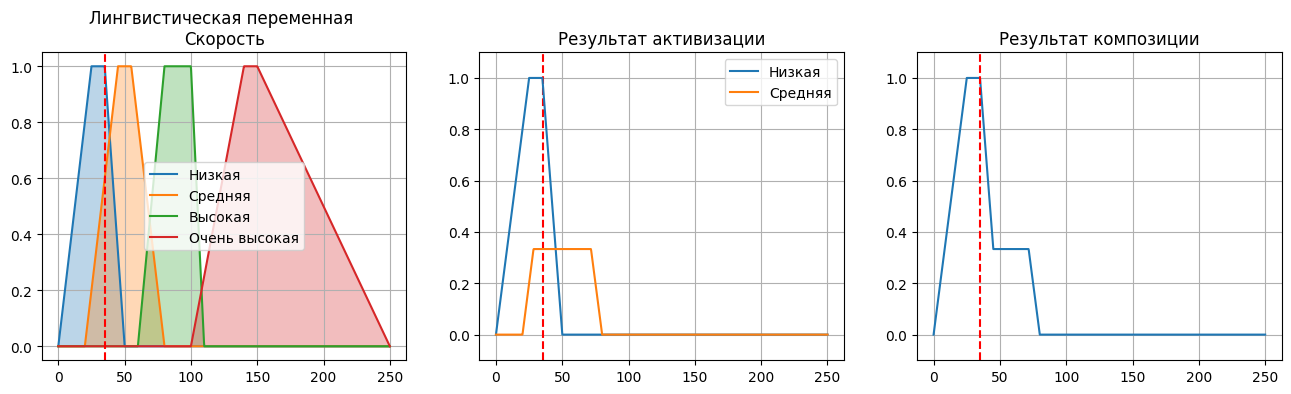

In [10]:

res, funcs = Search([
    LinguisticVariable(distance.name, distance.terms, 40)
], rules)




def display_results(res, funcs, val, cm, a, b):
    fig, ax = plt.subplots(1,3, figsize=(16, 4))
    val.display(a, b, ax=ax[0])
    x = np.linspace(a, b, 1000)
    ax[2].set_ylim(-0.1, 1.1)
    ax[2].plot(x, [res(float(y)) for y in x])
    ax[2].set_title("Результат композиции")
    ax[2].grid()

    def display_result_funcs(funcs, a, b, ax):
        x = np.linspace(a, b, 1000)
        ax.set_ylim(-0.1, 1.1)
        ax.grid()
        for n, f in funcs:
            ax.plot(x, [f(float(y)) for y in x], label=n)
        ax.legend()
        ax.set_title("Результат активизации")


    ax[2].axvline(x=cm, color='r', linestyle='--')
    ax[1].axvline(x=cm, color='r', linestyle='--')
    ax[0].axvline(x=cm, color='r', linestyle='--')

    display_result_funcs(funcs, a, b, ax[1])

cm = center_of_mass(res, 0, 250)
display_results(res, funcs, speed, cm, 0, 250)
print("Новое значение переменной:", cm)

Температура=Холодная & Давление=Низкое -> Клапан=Открыт на слив
Температура=Холодная & Давление=Высокое -> Клапан=Закрыт
Температура=Горячая & Давление=Низкое -> Клапан=Закрыт
Температура=Горячая & Давление=Высокое -> Клапан=Открыт на наполнение


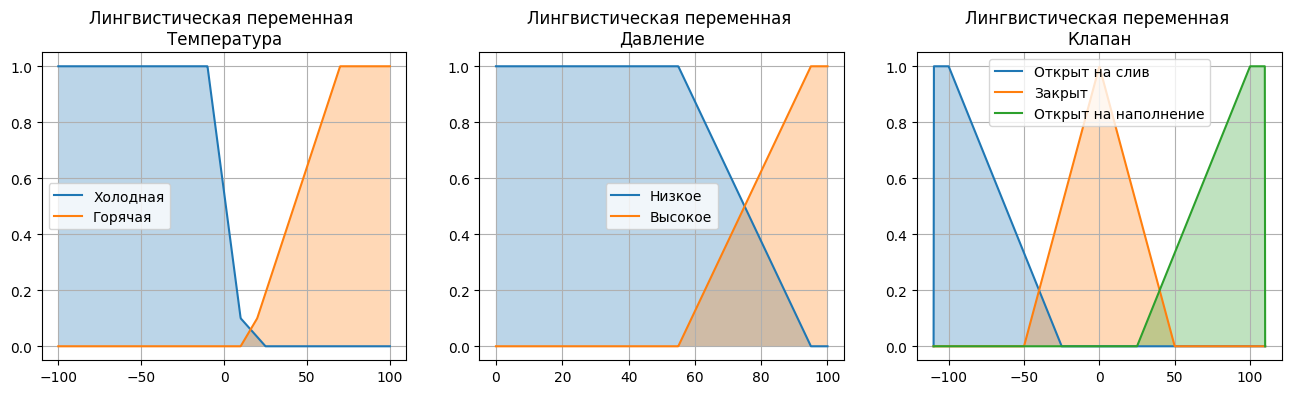

In [11]:
temp = LinguisticVariable('Температура', [
    Term('Холодная', PointsLian((-10, 1), (10, 0.1), (25, 0))),
    Term('Горячая', PointsLian((10, 0), (20, 0.1), (70, 1))),
])


preasure = LinguisticVariable('Давление', [
    Term('Низкое',  PointsLian((55, 1), (95, 0))),
    Term('Высокое', PointsLian((55, 0), (95, 1))),
])


valve = LinguisticVariable('Клапан', [
    Term('Открыт на слив',  PointsLian((-110, 0), (-110, 1), (-100, 1), (-25, 0))),
    Term('Закрыт',  Trian(-50, 0,  50)),
    Term('Открыт на наполнение', PointsLian((25, 0), (100, 1), (110, 1), (110, 0))),
])


rules2 = [
    Rule(dict([
        temp.getTermPairByName('Холодная'),
        preasure.getTermPairByName('Низкое')
    ]), *valve.getTermPairByName('Открыт на слив')),
    Rule(dict([
        temp.getTermPairByName('Холодная'),
        preasure.getTermPairByName('Высокое')
    ]), *valve.getTermPairByName('Закрыт')),
    Rule(dict([
        temp.getTermPairByName('Горячая'),
        preasure.getTermPairByName('Низкое')
    ]), *valve.getTermPairByName('Закрыт')),
    Rule(dict([
        temp.getTermPairByName('Горячая'),
        preasure.getTermPairByName('Высокое')
    ]), *valve.getTermPairByName('Открыт на наполнение'))
]


fig, ax = plt.subplots(1, 3, figsize=(10, 6))
fig.set_size_inches(16, 4)
temp.display(-100, 100, ax[0])
preasure.display(0, 100, ax[1])
valve.display(-110, 110, ax[2])

print("\n".join(["{:}".format(rule) for rule in rules2]))

Новое значение переменной: -33.84772455560921


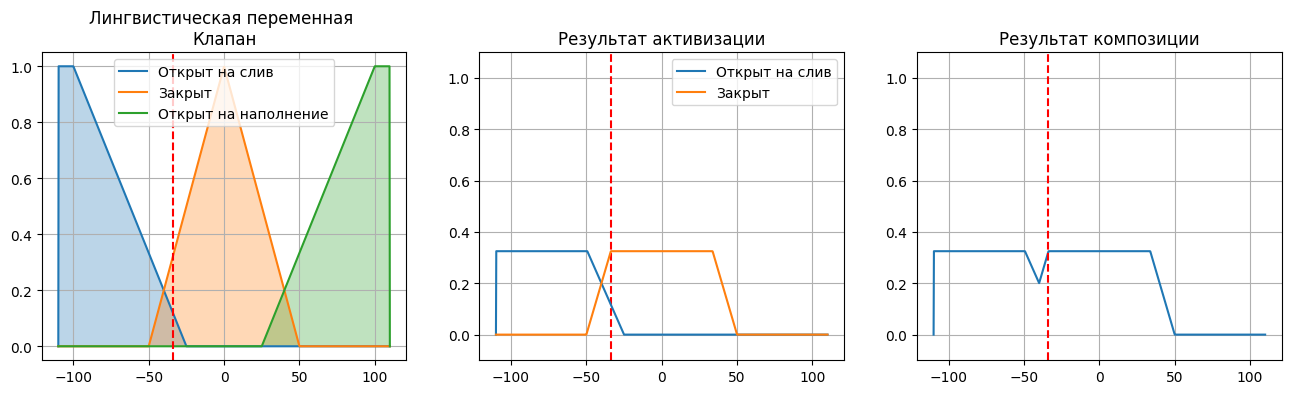

In [12]:
res, funcs = Search([
    temp.withValue(5),
    preasure.withValue(77),
], rules2)


cm = center_of_mass(res, -110, 110)
display_results(res, funcs, valve, cm, -110, 110)
print("Новое значение переменной:", cm)

Температура воздуха=PB & Скорость изменения температуры=PS -> Угол поворота ручки=NB
Температура воздуха=PB & Скорость изменения температуры=NS -> Угол поворота ручки=NS
Температура воздуха=PS & Скорость изменения температуры=PS -> Угол поворота ручки=NM
Температура воздуха=PS & Скорость изменения температуры=NS -> Угол поворота ручки=Z
Температура воздуха=NB & Скорость изменения температуры=NS -> Угол поворота ручки=PB
Температура воздуха=NB & Скорость изменения температуры=PS -> Угол поворота ручки=PS
Температура воздуха=NS & Скорость изменения температуры=NS -> Угол поворота ручки=PM
Температура воздуха=NS & Скорость изменения температуры=PS -> Угол поворота ручки=Z
Температура воздуха=PB & Скорость изменения температуры=Z -> Угол поворота ручки=NM
Температура воздуха=PS & Скорость изменения температуры=Z -> Угол поворота ручки=NS
Температура воздуха=NB & Скорость изменения температуры=Z -> Угол поворота ручки=PM
Температура воздуха=NS & Скорость изменения температуры=Z -> Угол пово

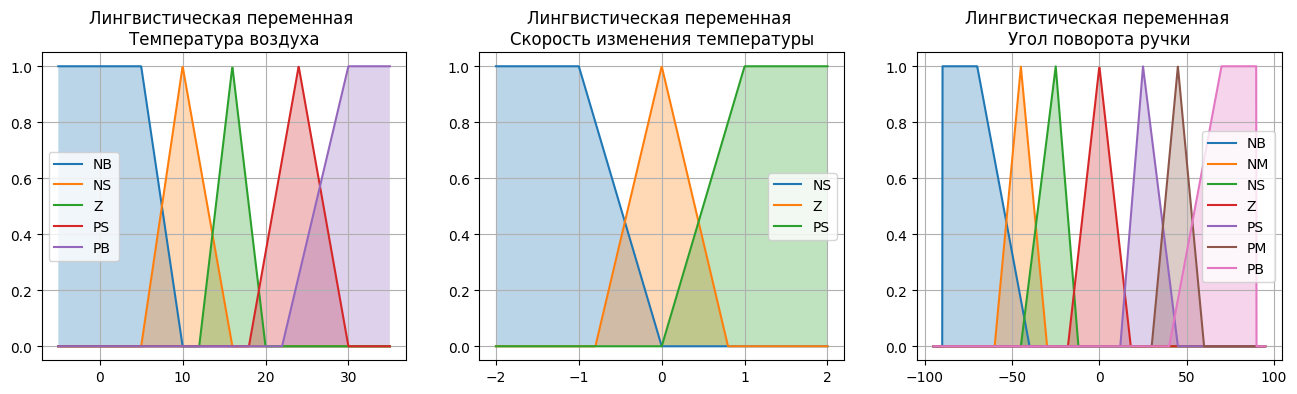

In [13]:
temp = LinguisticVariable('Температура воздуха', [
    Term('NB', PointsLian((5, 1), (10, 0))),
    Term('NS', PointsLian((5, 0), (10, 1), (16, 0))),
    Term('Z', PointsLian((12, 0), (16, 1), (20, 0))),
    Term('PS', PointsLian((18, 0), (24, 1), (30, 0))),
    Term('PB', PointsLian((22, 0), (30, 1))),
])


speed = LinguisticVariable('Скорость изменения температуры', [
    Term('NS', PointsLian((-1, 1), (0, 0))),
    Term('Z', PointsLian((-0.8, 0), (0, 1), (0.8, 0))),
    Term('PS', PointsLian((0, 0), (1, 1))),

])


angle = LinguisticVariable('Угол поворота ручки', [
    Term('NB', Trap(-90, -90, -70, -40)),
    Term('NM', Trap(-60, -45, -45, -30)),
    Term('NS', Trap(-45, -25, -25, -12)),
    Term('Z',  Trap(-18, 0, 0, 18)),
    Term('PS', Trap(12, 25, 25, 45)),
    Term('PM', Trap(30, 45, 45, 60)),
    Term('PB', Trap(40, 70, 90, 90)),    
])


rules = [
     Rule(dict([
        temp.getTermPairByName(x[0]),
        speed.getTermPairByName(x[1])
    ]), *angle.getTermPairByName(x[2])) 
    for x in [
        ['PB', 'PS', 'NB'], # 1
        ['PB', 'NS', 'NS'], # 2
        ['PS', 'PS', 'NM'], # 3
        ['PS', 'NS', 'Z'], # 4
        ['NB', 'NS', 'PB'], # 5
        ['NB', 'PS', 'PS'], # 6
        ['NS', 'NS', 'PM'], # 7

        ['NS', 'PS', 'Z'], # 8
        ['PB', 'Z', 'NM'], # 9
        ['PS', 'Z', 'NS'], # 10
        ['NB', 'Z', 'PM'], # 11
        ['NS', 'Z', 'PS'], # 12
        ['Z', 'PS', 'NS'], # 13
        ['Z', 'NS', 'PS'], # 14
        ['Z', 'Z', 'Z'], # 15
    ]

  
]


fig, ax = plt.subplots(1, 3, figsize=(12, 6))
fig.set_size_inches(16, 4)
temp.display(-5, 35, ax[0])
speed.display(-2, 2, ax[1])
angle.display(-95, 95, ax[2])

print("\n".join(["{:}".format(rule) for rule in rules]))

Новое значение переменной: -54.046040885081396


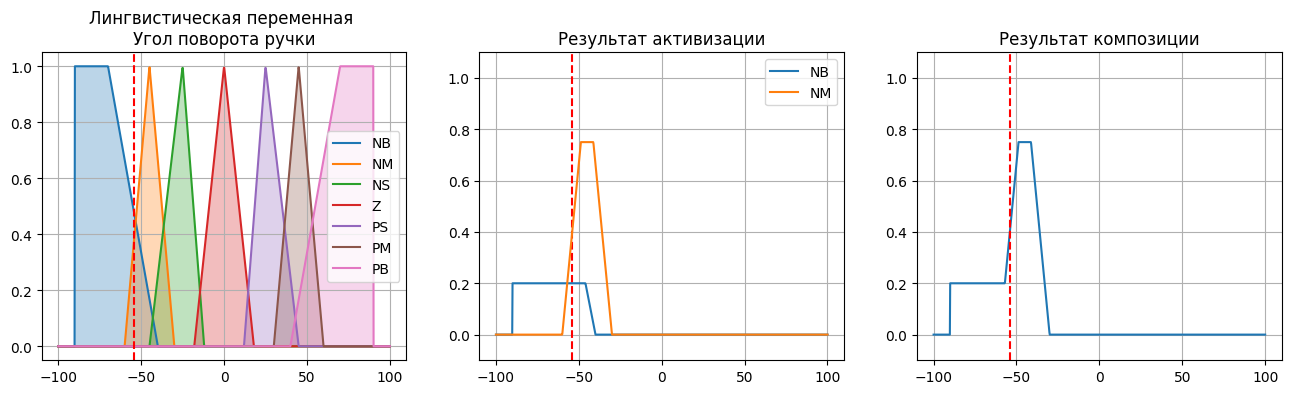

In [17]:
res, funcs = Search([
    temp.withValue(32),
    speed.withValue(+0.2),
], rules)


cm = center_of_mass(res, -100, 100)
display_results(res, funcs, angle, cm, -100, 100)
print("Новое значение переменной:", cm)